In [8]:
import numpy as np
import datetime as dt
import pandas as pd 
import os
import numpy as np
import time 
import joblib
import datetime 
from pathlib import Path
import gc
import matplotlib.pyplot as plt

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [10]:
model_root = "./models_all_characteristics"
model_name = "RF_n100"

In [11]:
start_year, end_year = 1996, 2013

def get_FI_stats(df,model_name):
    ever_in_t20 = (df.T >= df.T.apply(lambda x: x.sort_values(ascending=False).iloc[19])).T.sum()
    ever_in_t20 = (ever_in_t20[ever_in_t20>1].sort_values(ascending=False)/(end_year-start_year+1)).iloc[0:20]
    sorted_idx = np.argsort(ever_in_t20)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    fig = plt.figure(figsize=(12, 6))
    plt.barh(pos, ever_in_t20.iloc[sorted_idx], align="center", color='g')
    plt.yticks(pos, np.array(ever_in_t20.index)[sorted_idx])
    plt.xlabel('Frequency')
    plt.title(f"Top 20 Frequencies of Appearance in Top 20 Importance in {model_name}")
    # fig.savefig(Path("analysis_plots/all_features", f"FI_{model_name}_average_over_years.png"))
    stability = ever_in_t20.sum()/20
    return stability

def gen_agg_plot_n_result(model_name, start_year, end_year):
    topK = 20
    df = pd.DataFrame()
    for year in range(start_year, end_year + 1):
        model = joblib.load(Path(model_root, f"{model_name}_{year}.pkl"))
        with open(Path(model_root, f"{model_name}_{year}.txt"), "r") as fh:
            used_characteristics = list(
                map(lambda x: x[1:-1], 
                    fh.readline()[1:-1].split(", "))
            )
        # plot feature importance 
        feature_importance = model.feature_importances_#[:topK]
        year_column = pd.Series(feature_importance, index = used_characteristics, name=str(year))
        try:
            if df.empty:
                df[year_column.name] = year_column
            else:
                df = df.merge(year_column, left_index=True,right_index=True, how='outer')
        except:
            import pdb; pdb.set_trace()
    df = df.T
    ind = [col for col in df.columns if 'ind' in col]
    df['ind'] = df[ind].sum(axis=1)
    df = df[[col for col in df.columns if col not in ind]]
    stability = get_FI_stats(df,model_name)
    # print(stability)
    result = df.mean().sort_values(ascending=False).iloc[0:topK]
    sorted_idx = np.argsort(result)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    fig = plt.figure(figsize=(12, 6))
    plt.barh(pos, result.iloc[sorted_idx], align="center")
    plt.yticks(pos, np.array(result.index)[sorted_idx])
    plt.title(f"Top 20 Feature Importance {model_name} Averaged Over Years")
    # fig.savefig(Path("analysis_plots/all_features", f"FI_{model_name}_average_over_years.png"))
    return df

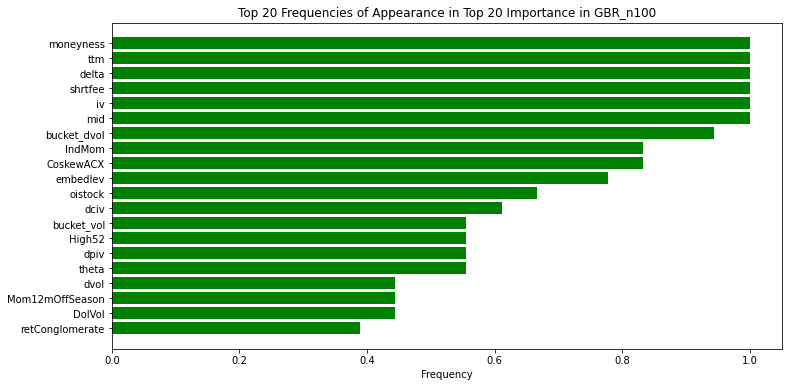

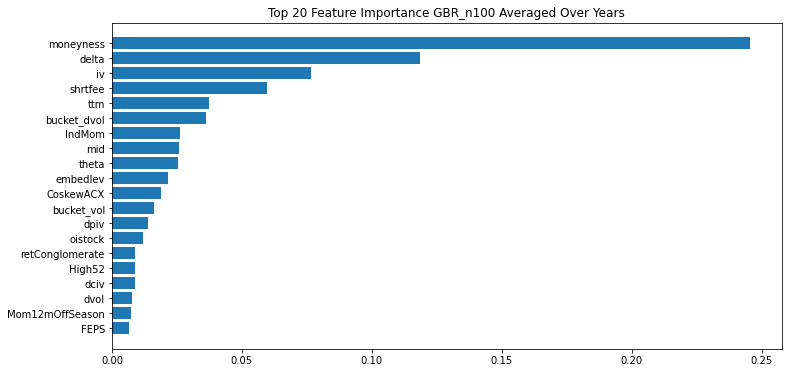

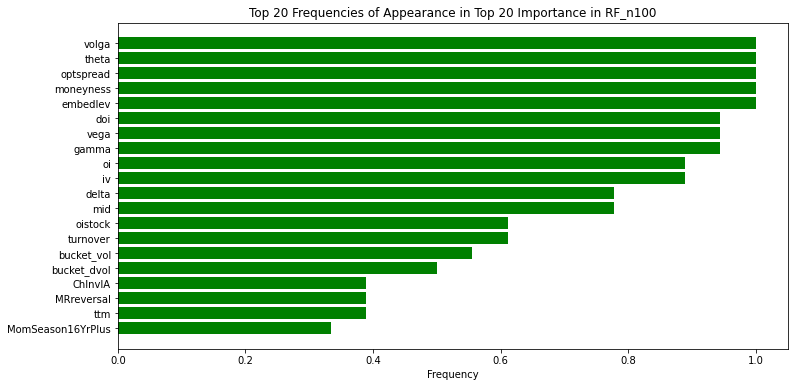

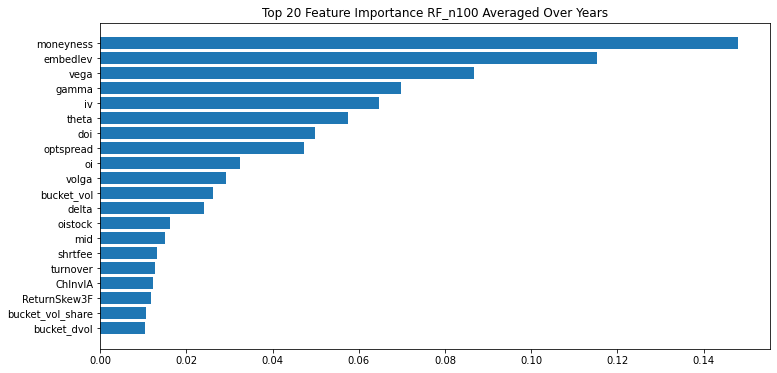

In [12]:
models = ["GBR_n100", "RF_n100"]
FI_all = pd.Series({model_name:gen_agg_plot_n_result(model_name, start_year, end_year) for model_name in models}).rename('stability')

In [13]:
option_chars = ['C',
'P',
'expiration_month',
'ttm',
'moneyness',
'iv',
'delta',
'gamma',
'theta',
'vega',
'volga',
'embedlev',
'oi',
'doi',
'mid',
'optspread',
'oistock',
'bucket_vol',
'bucket_dvol',
'bucket_vol_share',
'turnover',
'toi',
'pcratio',
'vol',
'nopt',
'dvol',
'pcpv',
'shrtfee',
'skewiv',
'dpiv',
'dciv',
'ntm_civpiv',
'ivd',
'ivslope',
'so',
'lso',
'dso',
'ldso',
'pba',
'vs_level',
'vs_change']
ind = ['ind']

In [14]:
for i in [0,1]:
    df = FI_all.iloc[i]
    chars = df.columns
    stock_chars = [char for char in chars if char not in (option_chars)]
    result = pd.DataFrame([df[class_].sum(axis=1) for class_ in [option_chars, stock_chars]]).T
    result.columns = ["option_chars", "stock_chars"]
    print(result.to_latex())
# plt.plot(result)

\begin{tabular}{lrr}
\toprule
{} &  option\_chars &  stock\_chars \\
\midrule
1996 &      0.726549 &     0.273451 \\
1997 &      0.736059 &     0.263941 \\
1998 &      0.708234 &     0.291766 \\
1999 &      0.715637 &     0.284363 \\
2000 &      0.729653 &     0.270347 \\
2001 &      0.744557 &     0.255443 \\
2002 &      0.701842 &     0.298158 \\
2003 &      0.733762 &     0.266238 \\
2004 &      0.734179 &     0.265821 \\
2005 &      0.745854 &     0.254146 \\
2006 &      0.785428 &     0.214572 \\
2007 &      0.802931 &     0.197069 \\
2008 &      0.789097 &     0.210903 \\
2009 &      0.795104 &     0.204896 \\
2010 &      0.814462 &     0.185538 \\
2011 &      0.800706 &     0.199294 \\
2012 &      0.792647 &     0.207353 \\
2013 &      0.708552 &     0.291448 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &  option\_chars &  stock\_chars \\
\midrule
1996 &      0.870350 &     0.129650 \\
1997 &      0.940857 &     0.059143 \\
1998 &      0.818319 &     0.181681 \

/var/folders/nh/s3ft86ks12xd4qdptmv1pvtc0000gn/T/ipykernel_63017/2625970570.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(result.to_latex())
/var/folders/nh/s3ft86ks12xd4qdptmv1pvtc0000gn/T/ipykernel_63017/2625970570.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(result.to_latex())
